In [1]:
from data_functions import *

In [2]:
DSMC = pd.read_csv('./Data/South Korea - Dongkuk Steel Mill Co Ltd (001230).csv')
DSMC

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021","13,650","13,700","13,750","13,450",0.19K,0.00%
1,"Mar 30, 2021","13,650","13,850","14,200","13,050",3.17M,0.74%
2,"Mar 29, 2021","13,550","12,500","13,800","12,500",0.20K,11.07%
3,"Mar 28, 2021","12,200","12,200","12,200","12,200",-,0.00%
4,"Mar 26, 2021","12,200","11,500","12,300","11,350",2.34M,7.96%
...,...,...,...,...,...,...,...
337,"Jan 07, 2020","5,690","5,740","5,770","5,650",303.89K,-0.70%
338,"Jan 06, 2020","5,730","5,890","5,890","5,680",319.88K,-2.88%
339,"Jan 03, 2020","5,900","5,870","5,920","5,830",230.40K,0.85%
340,"Jan 02, 2020","5,850","5,930","5,980","5,820",239.90K,-1.68%


In [3]:
DSMC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      342 non-null    object
 1   Price     342 non-null    object
 2   Open      342 non-null    object
 3   High      342 non-null    object
 4   Low       342 non-null    object
 5   Vol.      341 non-null    object
 6   Change %  341 non-null    object
dtypes: object(7)
memory usage: 18.8+ KB


In [4]:
## drop last row because it doesn't contain relevant information

DSMC.drop(341, inplace=True)

In [5]:
## change date column to datetime

DSMC['Date'] = pd.to_datetime(DSMC['Date'], format='%b %d, %Y')

In [6]:
## change price columns to integer

DSMC['Price'] = DSMC['Price'].str.replace(',', '').astype(float)
DSMC['Open'] = DSMC['Open'].str.replace(',', '').astype(float)
DSMC['High'] = DSMC['High'].str.replace(',', '').astype(float)
DSMC['Low'] = DSMC['Low'].str.replace(',', '').astype(float)

In [7]:
DSMC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      341 non-null    datetime64[ns]
 1   Price     341 non-null    float64       
 2   Open      341 non-null    float64       
 3   High      341 non-null    float64       
 4   Low       341 non-null    float64       
 5   Vol.      341 non-null    object        
 6   Change %  341 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 21.3+ KB


In [8]:
DSMC.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
DSMC

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,5850.0,5930.0,5980.0,5820.0,239.90K,-1.68%
1,2020-01-03,5900.0,5870.0,5920.0,5830.0,230.40K,0.85%
2,2020-01-06,5730.0,5890.0,5890.0,5680.0,319.88K,-2.88%
3,2020-01-07,5690.0,5740.0,5770.0,5650.0,303.89K,-0.70%
4,2020-01-08,5430.0,5640.0,5640.0,5390.0,524.10K,-4.57%
...,...,...,...,...,...,...,...
336,2021-03-26,12200.0,11500.0,12300.0,11350.0,2.34M,7.96%
337,2021-03-28,12200.0,12200.0,12200.0,12200.0,-,0.00%
338,2021-03-29,13550.0,12500.0,13800.0,12500.0,0.20K,11.07%
339,2021-03-30,13650.0,13850.0,14200.0,13050.0,3.17M,0.74%


In [9]:
## find rows for 2021 data

DSMC.loc[DSMC['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
272,2021-01-04,8680.0,8120.0,8690.0,7990.0,9.63K,6.90%
273,2021-01-05,9130.0,8700.0,9560.0,8640.0,0.02K,5.18%
274,2021-01-06,9050.0,9190.0,9300.0,8870.0,0.13K,-0.88%
275,2021-01-07,9140.0,9180.0,9410.0,9120.0,0.33K,0.99%
276,2021-01-08,9270.0,9150.0,9470.0,9050.0,2.39M,1.42%
...,...,...,...,...,...,...,...
336,2021-03-26,12200.0,11500.0,12300.0,11350.0,2.34M,7.96%
337,2021-03-28,12200.0,12200.0,12200.0,12200.0,-,0.00%
338,2021-03-29,13550.0,12500.0,13800.0,12500.0,0.20K,11.07%
339,2021-03-30,13650.0,13850.0,14200.0,13050.0,3.17M,0.74%


In [94]:
## split training data and testing data, testing data will be the year of 2021

training_data = DSMC[['Date', 'Price']][:270]
testing_data = DSMC[['Date', 'Price']][271:]

In [95]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(DSMC[['Price']])
scaled_train_data = scaled_data[:270]

# PyTorch
## Daily

In [98]:
X_train, y_train = get_train_data(scaled_train_data, 13)
X_test, y_test = get_test_data(DSMC, testing_data, scaler, 13)

In [99]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [100]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [101]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.06323498487472534
Epoch  1 MSE:  0.014034302905201912
Epoch  2 MSE:  0.029159963130950928
Epoch  3 MSE:  0.014412960968911648
Epoch  4 MSE:  0.015608941204845905
Epoch  5 MSE:  0.018319398164749146
Epoch  6 MSE:  0.018381407484412193
Epoch  7 MSE:  0.016783250495791435
Epoch  8 MSE:  0.014940564520657063
Epoch  9 MSE:  0.013721348717808723
Epoch  10 MSE:  0.013439451344311237
Epoch  11 MSE:  0.013902378268539906
Epoch  12 MSE:  0.014516101218760014
Epoch  13 MSE:  0.014674566686153412
Epoch  14 MSE:  0.014236432500183582
Epoch  15 MSE:  0.013525275513529778
Epoch  16 MSE:  0.012930687516927719
Epoch  17 MSE:  0.012628468684852123
Epoch  18 MSE:  0.01256896834820509
Epoch  19 MSE:  0.012583608739078045
Epoch  20 MSE:  0.012485603801906109
Epoch  21 MSE:  0.012131873518228531
Epoch  22 MSE:  0.011455398984253407
Epoch  23 MSE:  0.010491494089365005
Epoch  24 MSE:  0.009440171532332897
Epoch  25 MSE:  0.008759516291320324
Epoch  26 MSE:  0.008347049355506897
Epoch  27 MSE

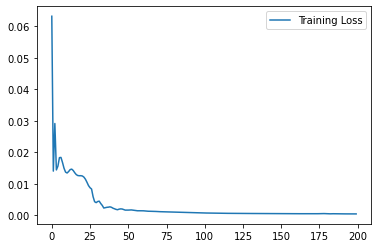

In [102]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [103]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 228.36 RMSE
Test Score: 504.63 RMSE


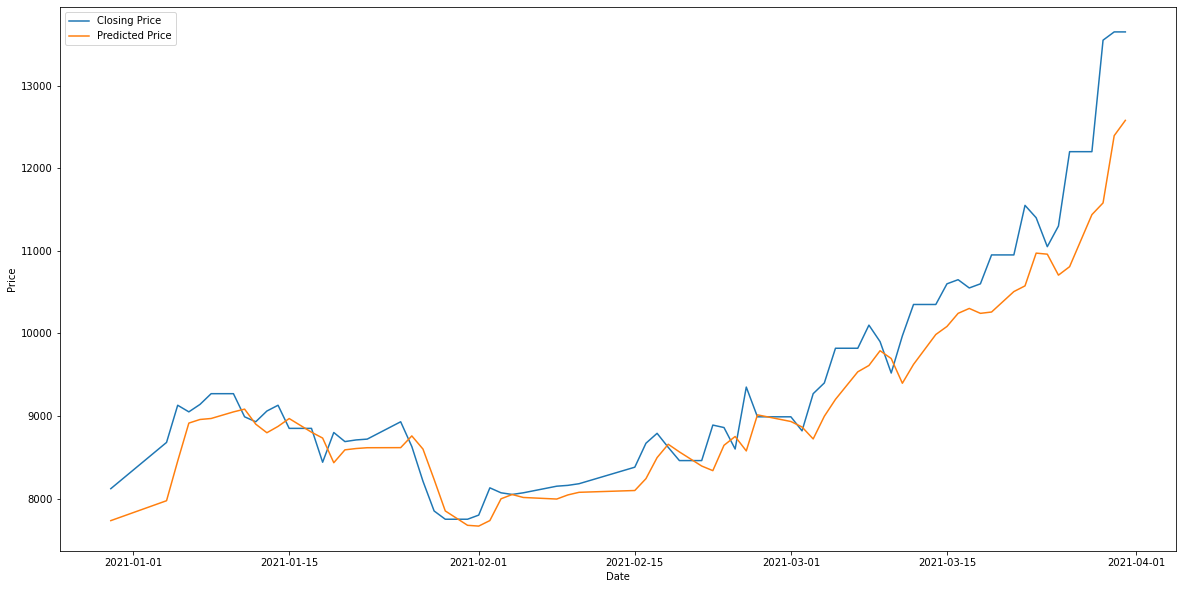

In [104]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [110]:
boll_daily = DSMC[['Date']]
boll_daily.drop(index=270, inplace=True)

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 13)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 13)
boll_daily

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Chris\AppData\Local\Temp/ipykernel_8008/1643964992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_8008/1643964992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,5850.000000,NaN,NaN,NaN
1,2020-01-03,5900.000000,NaN,NaN,NaN
2,2020-01-06,5730.000000,NaN,NaN,NaN
3,2020-01-07,5690.000000,NaN,NaN,NaN
4,2020-01-08,5430.000000,NaN,NaN,NaN
...,...,...,...,...,...
336,2021-03-26,10807.644531,10405.062425,11199.160724,9610.964126
337,2021-03-28,11437.569336,10544.531475,11380.325295,9708.737655
338,2021-03-29,11579.460938,10667.065204,11608.725116,9725.405293
339,2021-03-30,12393.804688,10844.755258,12121.624077,9567.886440


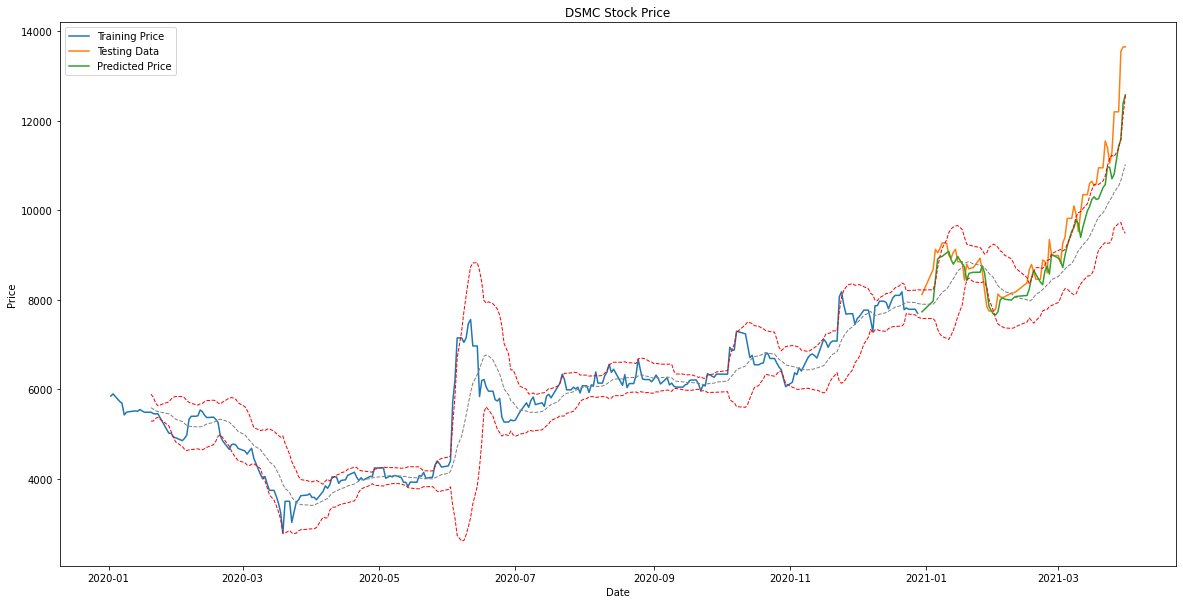

In [111]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DSMC Stock Price')
plt.legend()
plt.show()

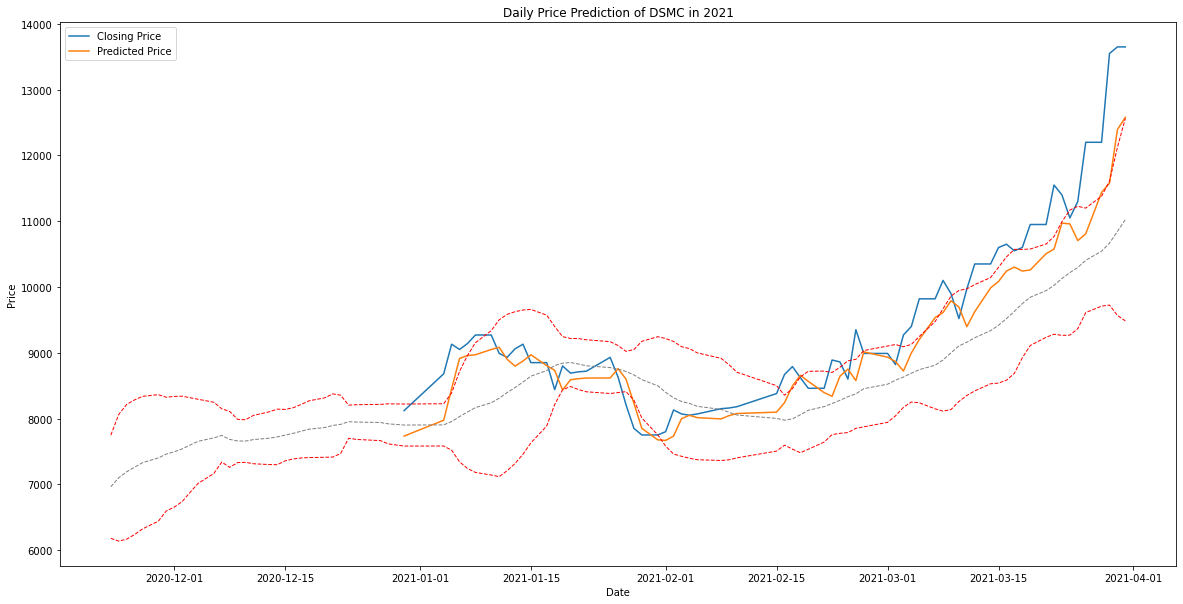

In [112]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][240:], boll_daily['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of DSMC in 2021')
plt.legend()
plt.show()

## Weekly

In [113]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [114]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 10)
X_test_w, y_test_w = get_weekly_test_data(DSMC, testing_data, scaler, 10)

In [115]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [116]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.0895552709698677
Epoch  1 MSE:  0.042449865490198135
Epoch  2 MSE:  0.01893269643187523
Epoch  3 MSE:  0.025541041046380997
Epoch  4 MSE:  0.015510914847254753
Epoch  5 MSE:  0.020754439756274223
Epoch  6 MSE:  0.021084332838654518
Epoch  7 MSE:  0.018121253699064255
Epoch  8 MSE:  0.014915833249688148
Epoch  9 MSE:  0.013737293891608715
Epoch  10 MSE:  0.015071839094161987
Epoch  11 MSE:  0.016263114288449287
Epoch  12 MSE:  0.015413341112434864
Epoch  13 MSE:  0.01399522740393877
Epoch  14 MSE:  0.01339541096240282
Epoch  15 MSE:  0.013562478125095367
Epoch  16 MSE:  0.0138947032392025
Epoch  17 MSE:  0.013929542154073715
Epoch  18 MSE:  0.01351199857890606
Epoch  19 MSE:  0.012758035212755203
Epoch  20 MSE:  0.011981822550296783
Epoch  21 MSE:  0.011571315117180347
Epoch  22 MSE:  0.011621658690273762
Epoch  23 MSE:  0.011352498084306717
Epoch  24 MSE:  0.009971082210540771
Epoch  25 MSE:  0.008332617580890656
Epoch  26 MSE:  0.007476387079805136
Epoch  27 MSE:  0.0

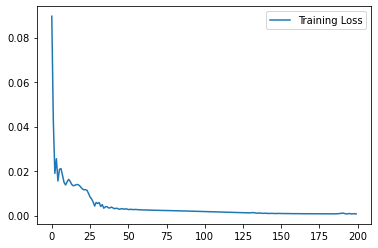

In [117]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [122]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(14, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5949.19 RMSE
Test Score: 8868.68 RMSE


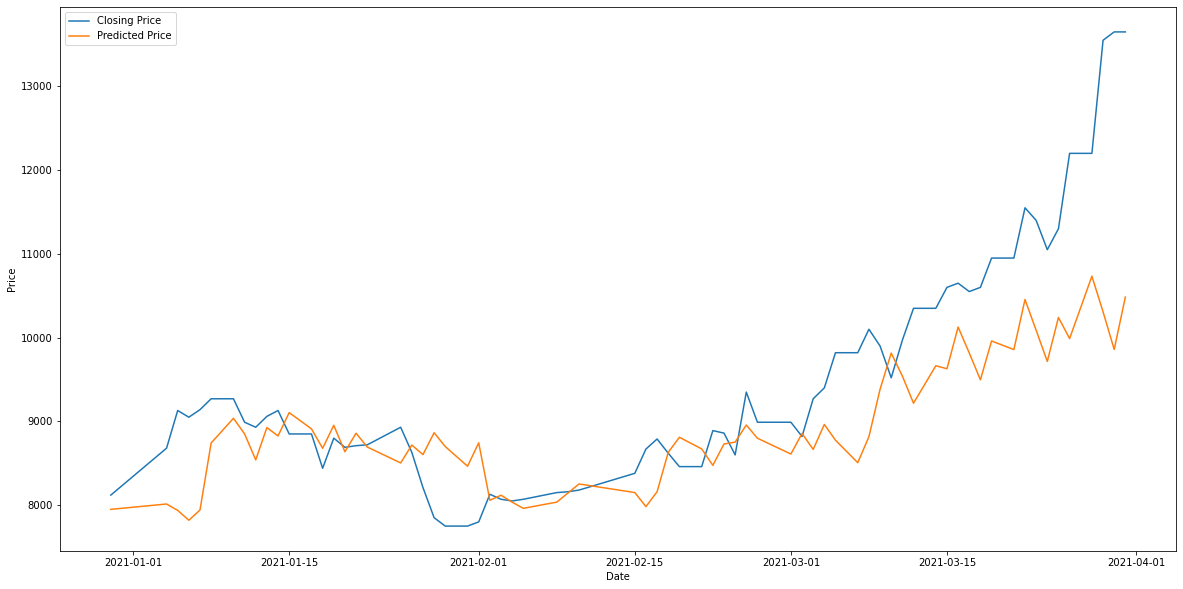

In [123]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [126]:
boll_weekly = DSMC[['Date']]
boll_weekly.drop(index=270, inplace=True)

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 10)
boll_weekly

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Chris\AppData\Local\Temp/ipykernel_8008/3727117470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_8008/3727117470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,5850.000000,NaN,NaN,NaN
1,2020-01-03,5900.000000,NaN,NaN,NaN
2,2020-01-06,5730.000000,NaN,NaN,NaN
3,2020-01-07,5690.000000,NaN,NaN,NaN
4,2020-01-08,5430.000000,NaN,NaN,NaN
...,...,...,...,...,...
336,2021-03-26,9988.817383,9974.458008,10521.207272,9427.708744
337,2021-03-28,10733.274414,10035.123730,10761.897370,9308.350091
338,2021-03-29,10308.404297,10084.301855,10811.917342,9356.686369
339,2021-03-30,9858.728516,10120.553418,10747.041907,9494.064929


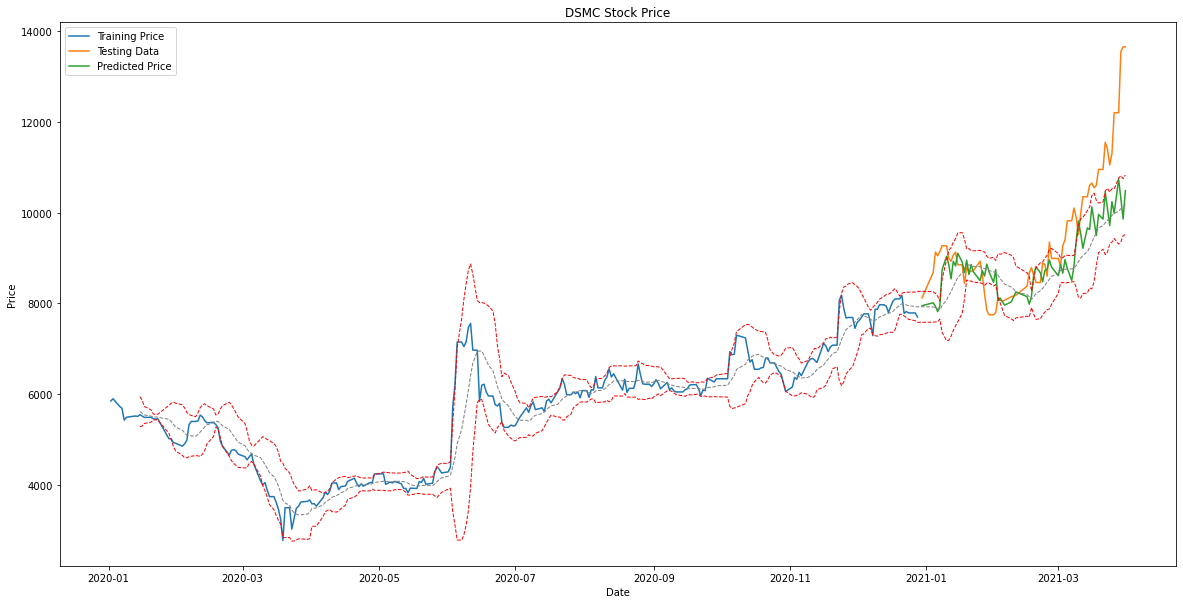

In [128]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DSMC Stock Price')
plt.legend()
plt.show()

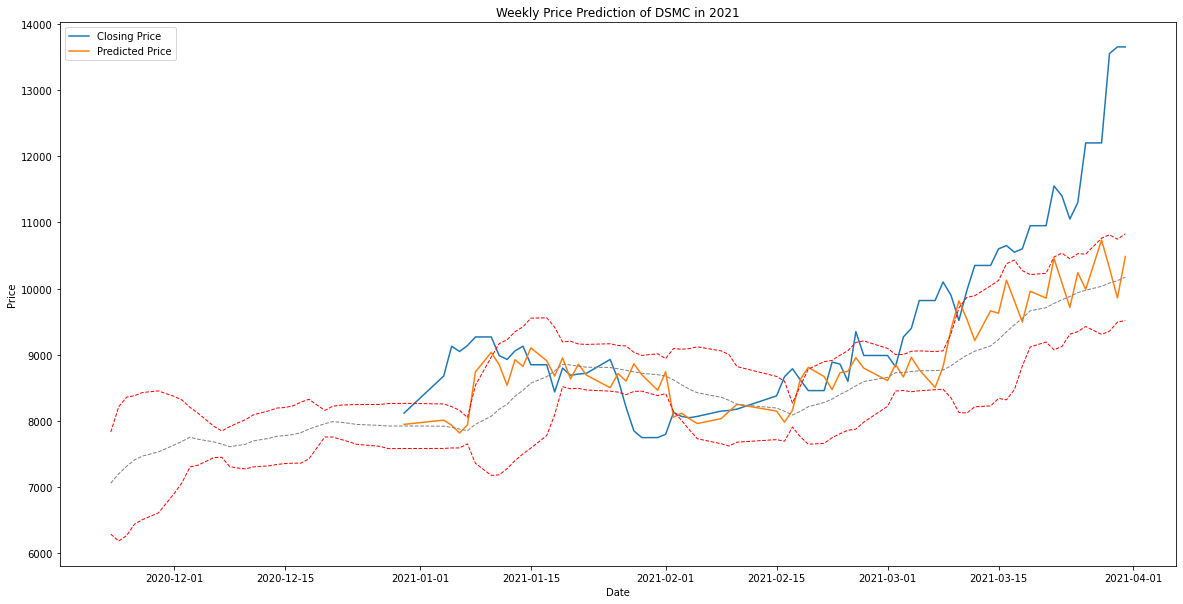

In [129]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][240:], boll_weekly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of DSMC in 2021')
plt.legend()
plt.show()

# Monthly

In [130]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [134]:
testing_data_m = DSMC[['Date', 'Price']][281:]

In [144]:
testing_data_m

,Date,Price
281,2021-01-14,9130.0
282,2021-01-15,8850.0
283,2021-01-17,8850.0
284,2021-01-18,8440.0
285,2021-01-19,8800.0
286,2021-01-20,8690.0
287,2021-01-21,8710.0
288,2021-01-22,8720.0
289,2021-01-25,8930.0
290,2021-01-26,8630.0


In [136]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 30)
X_test_m, y_test_m = get_monthly_test_data(DSMC, testing_data_m, scaler, 30)

In [137]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [138]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.11651317030191422
Epoch  1 MSE:  0.07791388034820557
Epoch  2 MSE:  0.03778509795665741
Epoch  3 MSE:  0.07073547691106796
Epoch  4 MSE:  0.016945380717515945
Epoch  5 MSE:  0.0219221543520689
Epoch  6 MSE:  0.026763256639242172
Epoch  7 MSE:  0.025978408753871918
Epoch  8 MSE:  0.022945547476410866
Epoch  9 MSE:  0.0204258244484663
Epoch  10 MSE:  0.019514940679073334
Epoch  11 MSE:  0.01959579810500145
Epoch  12 MSE:  0.01931038126349449
Epoch  13 MSE:  0.018157456070184708
Epoch  14 MSE:  0.016731036826968193
Epoch  15 MSE:  0.015757646411657333
Epoch  16 MSE:  0.015483623370528221
Epoch  17 MSE:  0.01571236364543438
Epoch  18 MSE:  0.016087094321846962
Epoch  19 MSE:  0.0163191519677639
Epoch  20 MSE:  0.016286348924040794
Epoch  21 MSE:  0.016023453325033188
Epoch  22 MSE:  0.015654301270842552
Epoch  23 MSE:  0.015313144773244858
Epoch  24 MSE:  0.015085728839039803
Epoch  25 MSE:  0.01498409267514944
Epoch  26 MSE:  0.014957604929804802
Epoch  27 MSE:  0.0149311

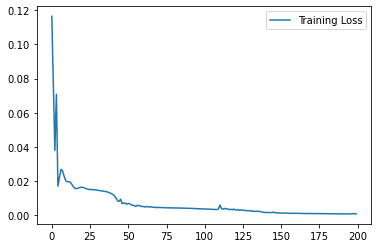

In [139]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [140]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5930.61 RMSE
Test Score: 8288.01 RMSE


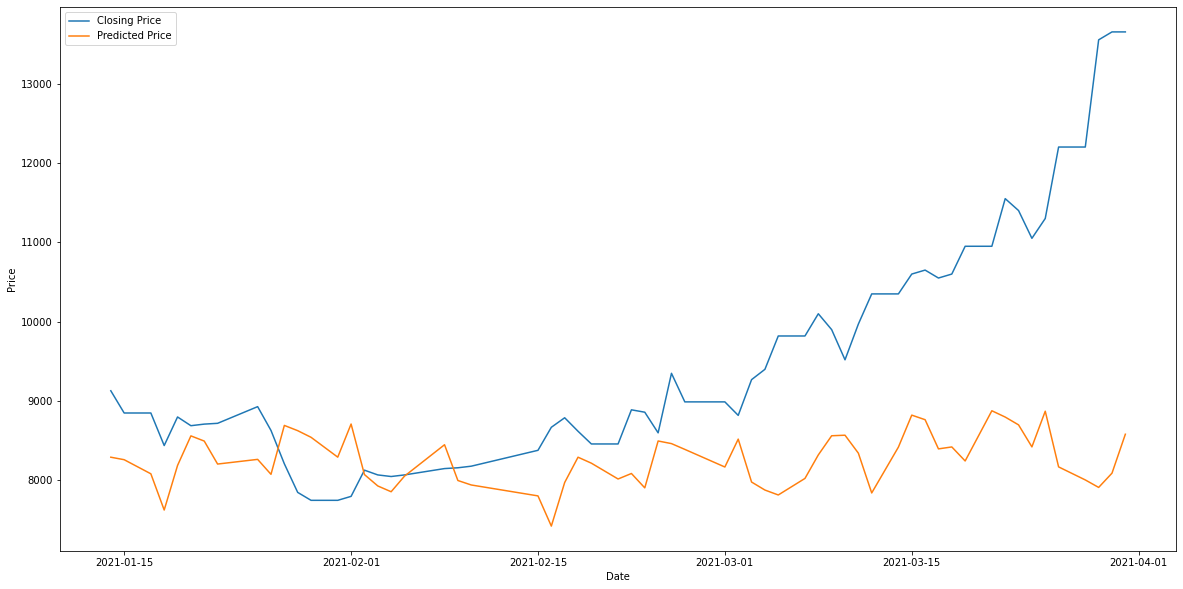

In [142]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data_m['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data_m['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [155]:
boll_monthly = DSMC[['Date']]
boll_monthly.drop(index=[270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280], inplace=True)

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 13)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 13)
boll_monthly

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Chris\AppData\Local\Temp/ipykernel_8008/1420579528.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_8008/1420579528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,5850.000000,NaN,NaN,NaN
1,2020-01-03,5900.000000,NaN,NaN,NaN
2,2020-01-06,5730.000000,NaN,NaN,NaN
3,2020-01-07,5690.000000,NaN,NaN,NaN
4,2020-01-08,5430.000000,NaN,NaN,NaN
...,...,...,...,...,...
336,2021-03-26,8171.080078,8520.211726,9156.355656,7884.067796
337,2021-03-28,8006.851074,8532.813739,9115.030745,7950.596734
338,2021-03-29,7912.574707,8493.741361,9169.307557,7818.175165
339,2021-03-30,8092.242676,8437.512583,9115.921114,7759.104052


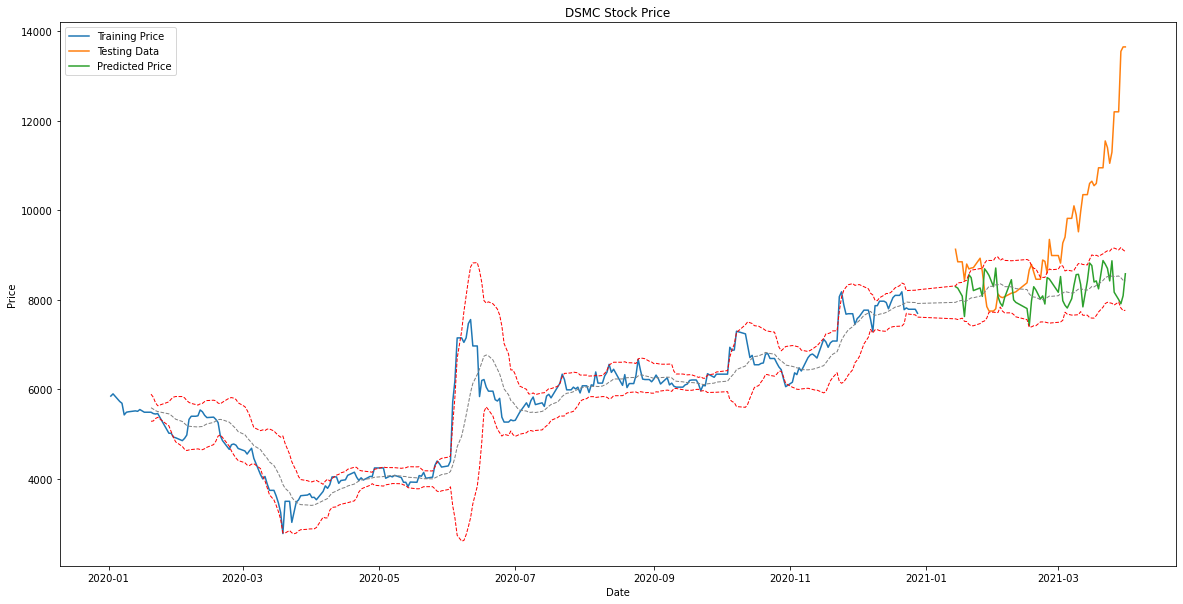

In [156]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data_m['Date'], testing_data_m['Price'], label='Testing Data')
plt.plot(testing_data_m['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DSMC Stock Price')
plt.legend()
plt.show()

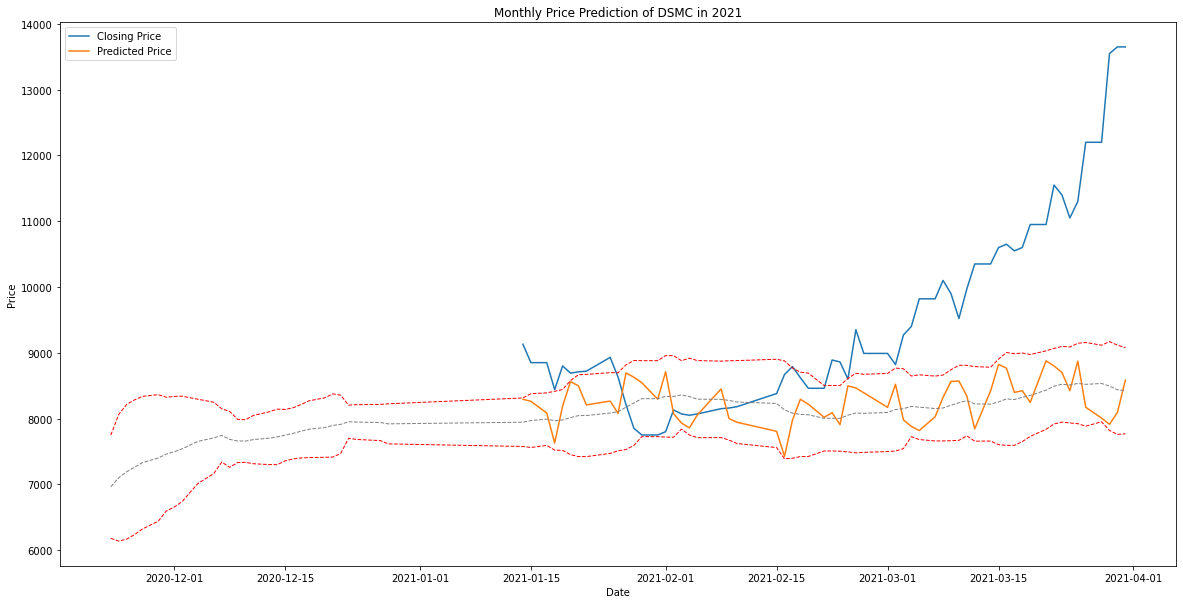

In [157]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data_m['Date'], testing_data_m['Price'], label='Closing Price')
plt.plot(testing_data_m['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of DSMC in 2021')
plt.legend()
plt.show()